# Assignment 1 Machine Learning

## Oisin Brannock

1. Import the relevant packages

In [2]:
from id3 import Id3Estimator, export_graphviz, export_text
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from IPython.display import Image 
import warnings
warnings.filterwarnings('ignore')

2. Import and tidy up the training dataset

In [3]:
cols = ['calorific_value', 'nitrogen', 'turbidity', 'style', 'alcohol', 'sugars', 'bitterness', 'beer_id', 'colour', 'degree_of_fermentation']

beers_train = pd.read_table("C:/Users/Oisin/Desktop/ML Assignment 1/Data/beer_training.txt",
                           names = cols,
                           index_col = 'beer_id')

beers_train = beers_train[['style', 'calorific_value', 'nitrogen', 'turbidity', 'alcohol', 'sugars', 'bitterness', 'colour', 'degree_of_fermentation']]

beers_train = beers_train.sort_values('style')

3. Specify which columns will be used as independent variables

In [4]:
feature_cols = ['calorific_value', 'nitrogen', 'turbidity', 'alcohol', 'sugars', 'bitterness', 'colour', 'degree_of_fermentation']

4. Import in test data in similar manner to training data and clean

In [5]:
beers_test = pd.read_table("C://Users/Oisin/Desktop/ML Assignment 1/Data/beer_test.txt",
                           names = cols,
                           index_col = 'beer_id')

beers_test = beers_test[['style', 'calorific_value', 'nitrogen', 'turbidity', 'alcohol', 'sugars', 'bitterness', 'colour', 'degree_of_fermentation']]

beers_test = beers_test.sort_values('style')

5. For the ID3 package chosen, the data needs to be in numpy array format so conversion from dataframe is done here

In [6]:
x_train = beers_train[feature_cols]
x_train = x_train.to_numpy()

y_train = beers_train['style']
y_train = y_train.to_numpy()

x_test = beers_test[feature_cols]
x_test = x_test.to_numpy()

y_test = beers_test['style']
y_test = y_test.to_numpy()

In [7]:
x_train[0:3]

array([[45.30530973,  0.45954818,  1.91727273,  4.22769231, 16.67      ,
        12.56894737, 11.04      , 62.17857143],
       [45.03982301,  0.53217163,  1.75636364,  4.32615385, 17.15      ,
        11.62310526, 12.72      , 70.87      ],
       [40.21681416,  0.50528541,  1.35545454,  4.12      , 16.77      ,
        13.74557895, 11.04      , 70.88285714]])

In [8]:
y_train[0:3]

array(['ale', 'ale', 'ale'], dtype=object)

6. Train the decision tree algorithm using ID3

In [9]:
clf = Id3Estimator()

In [10]:
clf.fit(x_train,y_train,check_input=True)

Id3Estimator(gain_ratio=False, is_repeating=False, max_depth=None,
             min_entropy_decrease=0.0, min_samples_split=2, prune=False)

In [11]:
print(export_text(clf.tree_, feature_cols))


colour <=9.42
|   bitterness <=9.67: stout (33) 
|   bitterness >9.67: lager (2) 
colour >9.42
|   alcohol <=3.93: lager (38) 
|   alcohol >3.93
|   |   bitterness <=8.23
|   |   |   calorific_value <=41.72: stout (5) 
|   |   |   calorific_value >41.72: lager (2) 
|   |   bitterness >8.23
|   |   |   turbidity <=1.27
|   |   |   |   sugars <=16.74: lager (2) 
|   |   |   |   sugars >16.74: ale (4) 
|   |   |   turbidity >1.27: ale (38) 



7. Check accuracy of our model on the training and test datasets by creating confusion matrices and a report for each 

In [12]:
y_pred_train = clf.predict(x_train)

In [13]:
y_pred_train

array(['ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale',
       'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale',
       'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale',
       'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale',
       'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'stout', 'stout', 'stout', 'stout', 'stout', 'stout', 'stout',
       'stout', 'stout', 'stout', 'stout', 'stout', 'stout', 'stout',
       'stout', 'stout', 'stout', 'stout', 'stout', 'stout', 'stout',
       'stout', 'stout'

In [14]:
y_train

array(['ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale',
       'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale',
       'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale',
       'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale',
       'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'stout', 'stout', 'stout', 'stout', 'stout', 'stout', 'stout',
       'stout', 'stout', 'stout', 'stout', 'stout', 'stout', 'stout',
       'stout', 'stout', 'stout', 'stout', 'stout', 'stout', 'stout',
       'stout', 'stout'

In [15]:
y_train == y_pred_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [16]:
y_train_list = y_train.tolist()

In [17]:
y_pred_train_list = y_pred_train.tolist()

In [18]:
confusion_matrix(y_train_list,y_pred_train_list)

array([[42,  0,  0],
       [ 0, 44,  0],
       [ 0,  0, 38]], dtype=int64)

In [19]:
report_train = classification_report(y_train, y_pred_train, output_dict=True)
train_report = pd.DataFrame(report_train).transpose()
train_report

,precision,recall,f1-score,support
ale,1.0,1.0,1.0,42.0
lager,1.0,1.0,1.0,44.0
stout,1.0,1.0,1.0,38.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,124.0
weighted avg,1.0,1.0,1.0,124.0


In [20]:
y_pred = clf.predict(x_test)

In [21]:
y_test

array(['ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale', 'ale',
       'ale', 'lager', 'lager', 'lager', 'lager', 'lager', 'lager',
       'lager', 'lager', 'lager', 'lager', 'stout', 'stout', 'stout',
       'stout', 'stout', 'stout', 'stout', 'stout', 'stout', 'stout'],
      dtype=object)

In [22]:
y_test == clf.predict(x_test)

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True])

In [23]:
y_test_list = y_test.tolist()

In [24]:
y_pred_list = y_pred.tolist()

In [25]:
confusion_matrix(y_test_list,y_pred_list)

array([[9, 1, 0],
       [2, 7, 1],
       [0, 2, 8]], dtype=int64)

In [26]:
report_test = classification_report(y_test, y_pred, output_dict=True)
test_report = pd.DataFrame(report_test).transpose()
test_report

,precision,recall,f1-score,support
ale,0.818182,0.9,0.857143,10.0
lager,0.700000,0.7,0.700000,10.0
stout,0.888889,0.8,0.842105,10.0
accuracy,0.800000,0.8,0.800000,0.8
macro avg,0.802357,0.8,0.799749,30.0
weighted avg,0.802357,0.8,0.799749,30.0


In [27]:
accuracy_score(y_test, y_pred)

0.8

8. Plot the ID3 tree alogorthm and use gvedit to convert from dot file to png

In [28]:
export_graphviz(clf.tree_, "id3.dot", feature_cols)

<_io.TextIOWrapper name='id3.dot' mode='w' encoding='utf8'>

# Then used graphviz.exe to produce the plot as png as shown:


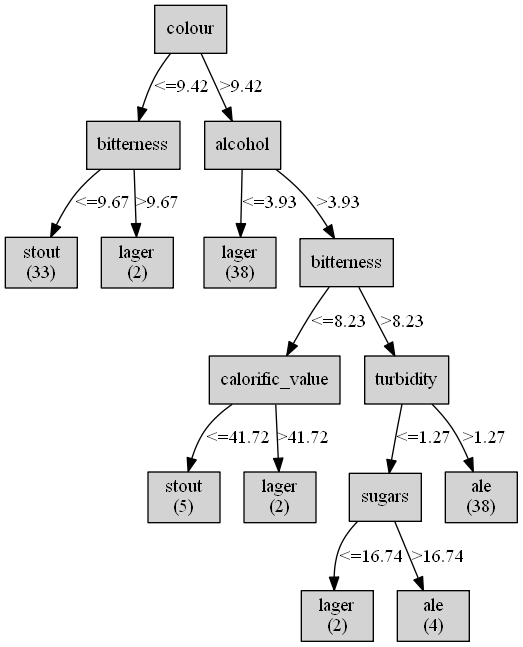

In [29]:
Image("C:/Users/Oisin/Downloads/id3.png")